In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [107]:
model_path = "./save_models/LSTM_MNIST_3.pth"
device = "cuda"
model = torch.load(model_path, weights_only=False, map_location=torch.device(device))

In [43]:
def generate_image_MLP(model):
    new_image = torch.zeros(1, 28*28).to(device)
    mask = torch.ones_like(new_image, dtype=torch.int).to(device)
    for i in range(28*28):
        logits = model(new_image, mask)
        probs = F.softmax(logits)
        sample = torch.multinomial(probs, 1)
        new_image[0][i] = sample

    return new_image

In [105]:
greedy = False
def generate_image_rnn(model):
    h = model.get_init_hidden(1)
    h = h[0].to(device), h[1].to(device)
    new_image = torch.zeros(1, 28 * 28).to(device)
    cur_input = torch.tensor([[[0.0]]]).to(device)

    for i in range(28*28):
        logits, h = model(cur_input, h)

        probs = F.softmax(logits[0][0])

        if greedy:
            sample = torch.argmax(probs)
        else:
            sample = torch.multinomial(probs, 1)
        new_image[0][i] = sample

        cur_input = sample.float().reshape(1, 1, 1)

    return new_image

C:\Users\86150\AppData\Local\Temp\ipykernel_10488\2849669611.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(logits[0][0])


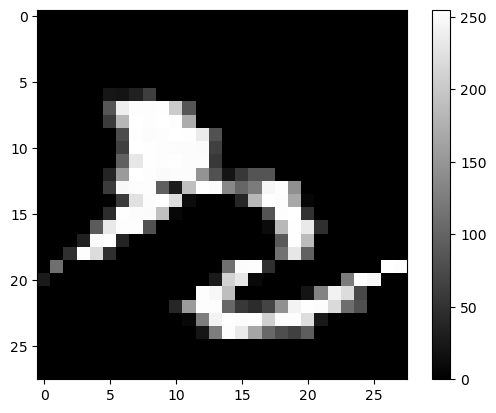

In [119]:
new_image = generate_image_rnn(model).to("cpu")
plt.imshow(new_image[0].reshape(28,28).detach().numpy(), cmap="gray")
plt.colorbar()  # 显示颜色条
plt.show()